In [95]:
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM,Activation,Dropout
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [96]:
df=pd.read_csv("data.csv")

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [98]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [99]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [100]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [101]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [102]:
df.fillna(0,inplace=True)

In [103]:
df = df[['Date Time', 'p (mbar)', 'wd (deg)', 'wv (m/s)', 'H2OC (mmol/mol)', 'T (degC)', 'rh (%)', 'sh (g/kg)']]

In [104]:
df.isnull().sum()

Date Time          0
p (mbar)           0
wd (deg)           0
wv (m/s)           0
H2OC (mmol/mol)    0
T (degC)           0
rh (%)             0
sh (g/kg)          0
dtype: int64

In [105]:
df = df.rename(columns={'p (mbar)': 'pressure', 'wd (deg)': 'wind_direction', 
                        'wv (m/s)': 'wind_speed', 'H2OC (mmol/mol)': 'humidity',
                        'T (degC)': 'temperature', 'rh (%)': 'relative_humidity',
                        'sh (g/kg)': 'specific_humidity'})

In [106]:
df.head()

,Date Time,pressure,wind_direction,wind_speed,humidity,temperature,relative_humidity,specific_humidity
0,01.01.2009 00:10:00,996.52,152.3,1.03,3.12,-8.02,93.3,1.94
1,01.01.2009 00:20:00,996.57,136.1,0.72,3.03,-8.41,93.4,1.89
2,01.01.2009 00:30:00,996.53,171.6,0.19,3.02,-8.51,93.9,1.88
3,01.01.2009 00:40:00,996.51,198.0,0.34,3.08,-8.31,94.2,1.92
4,01.01.2009 00:50:00,996.51,214.3,0.32,3.09,-8.27,94.1,1.92


In [107]:
df.corr()

,pressure,wind_direction,wind_speed,humidity,temperature,relative_humidity,specific_humidity
pressure,1.000000,-0.063258,-0.005701,-0.069804,-0.045375,-0.018352,-0.069762
wind_direction,-0.063258,1.000000,-0.015322,0.019607,0.038732,-0.015912,0.019376
wind_speed,-0.005701,-0.015322,1.000000,-0.009477,-0.004689,-0.005020,-0.009479
humidity,-0.069804,0.019607,-0.009477,1.000000,0.867177,-0.150969,0.999997
temperature,-0.045375,0.038732,-0.004689,0.867177,1.000000,-0.572416,0.866755
relative_humidity,-0.018352,-0.015912,-0.005020,-0.150969,-0.572416,1.000000,-0.150841
specific_humidity,-0.069762,0.019376,-0.009479,0.999997,0.866755,-0.150841,1.000000


<Axes: >

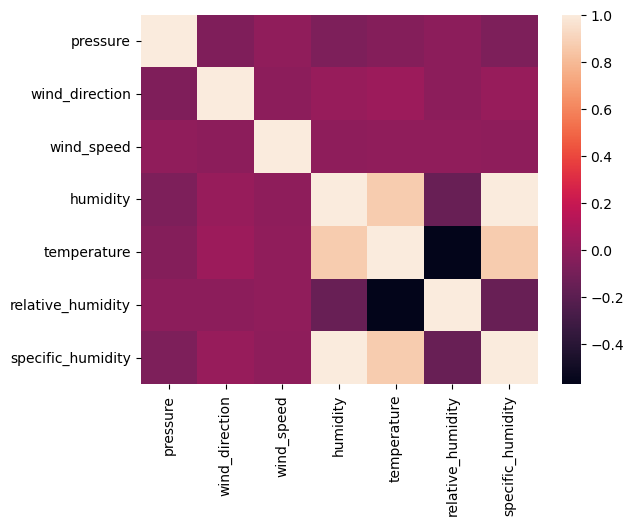

In [108]:
sn.heatmap(df.corr())

In [109]:
df.head()

,Date Time,pressure,wind_direction,wind_speed,humidity,temperature,relative_humidity,specific_humidity
0,01.01.2009 00:10:00,996.52,152.3,1.03,3.12,-8.02,93.3,1.94
1,01.01.2009 00:20:00,996.57,136.1,0.72,3.03,-8.41,93.4,1.89
2,01.01.2009 00:30:00,996.53,171.6,0.19,3.02,-8.51,93.9,1.88
3,01.01.2009 00:40:00,996.51,198.0,0.34,3.08,-8.31,94.2,1.92
4,01.01.2009 00:50:00,996.51,214.3,0.32,3.09,-8.27,94.1,1.92


In [110]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True): 
    n_vars = 1 if type(data) is list else data.shape[1] 
    df = pd.DataFrame(data) 
    cols, names = list(), list() 
    for i in range(n_in, 0, -1):  
        cols.append(df.shift(i))  
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)] 
    for i in range(0, n_out):  
        cols.append(df.shift(-i))  
        if i == 0:   
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]  
        else:   
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)] 
    agg = pd.concat(cols, axis=1) 
    agg.columns = names 
    if dropnan:  
        agg.dropna(inplace=True) 
    return agg 

In [111]:
df = df.set_index(pd.DatetimeIndex(df['Date Time']))

In [112]:
df.index.name='date'

In [113]:
df.head()

,Date Time,pressure,wind_direction,wind_speed,humidity,temperature,relative_humidity,specific_humidity
date,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,152.3,1.03,3.12,-8.02,93.3,1.94
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,136.1,0.72,3.03,-8.41,93.4,1.89
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,171.6,0.19,3.02,-8.51,93.9,1.88
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,198.0,0.34,3.08,-8.31,94.2,1.92
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,214.3,0.32,3.09,-8.27,94.1,1.92


In [114]:
df=df.drop('Date Time',axis=1)

In [115]:
df.to_csv("weather.csv")

In [116]:
df.head()

,pressure,wind_direction,wind_speed,humidity,temperature,relative_humidity,specific_humidity
date,,,,,,,
2009-01-01 00:10:00,996.52,152.3,1.03,3.12,-8.02,93.3,1.94
2009-01-01 00:20:00,996.57,136.1,0.72,3.03,-8.41,93.4,1.89
2009-01-01 00:30:00,996.53,171.6,0.19,3.02,-8.51,93.9,1.88
2009-01-01 00:40:00,996.51,198.0,0.34,3.08,-8.31,94.2,1.92
2009-01-01 00:50:00,996.51,214.3,0.32,3.09,-8.27,94.1,1.92


### For Temperature

Train data shape: (294385, 7)
Validation data shape: (84110, 7)
Test data shape: (42056, 7)
Epoch 1/10


/home/chanduchowdary/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2300/2300 - 5s - 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 8.6446e-05 - val_mean_squared_error: 8.6446e-05
Epoch 2/10
2300/2300 - 4s - 2ms/step - loss: 3.9296e-04 - mean_squared_error: 3.9296e-04 - val_loss: 1.4799e-04 - val_mean_squared_error: 1.4799e-04
Epoch 3/10
2300/2300 - 3s - 1ms/step - loss: 1.7821e-04 - mean_squared_error: 1.7821e-04 - val_loss: 7.8636e-05 - val_mean_squared_error: 7.8636e-05
Epoch 4/10
2300/2300 - 7s - 3ms/step - loss: 1.5449e-04 - mean_squared_error: 1.5449e-04 - val_loss: 5.4380e-05 - val_mean_squared_error: 5.4380e-05
Epoch 5/10
2300/2300 - 3s - 2ms/step - loss: 1.4084e-04 - mean_squared_error: 1.4084e-04 - val_loss: 4.2996e-05 - val_mean_squared_error: 4.2996e-05
Epoch 6/10
2300/2300 - 3s - 1ms/step - loss: 1.2920e-04 - mean_squared_error: 1.2920e-04 - val_loss: 4.4819e-05 - val_mean_squared_error: 4.4819e-05
Epoch 7/10
2300/2300 - 3s - 1ms/step - loss: 1.2130e-04 - mean_squared_error: 1.2130e-04 - val_loss: 5.7002e-05 - val_mean_sq

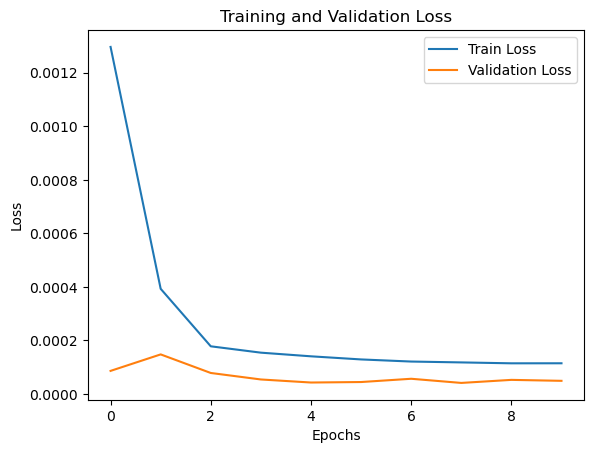

1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step
R-squared score: 0.9974932578203
RMSE: 0.3929022088415328


In [117]:
# Splitting data into train, validation, and test sets
n_train_hours = int(len(df) * 0.7)
n_val_hours = int(len(df) * 0.2)
n_test_hours = len(df) - n_train_hours - n_val_hours

train = df.iloc[:n_train_hours]
val = df.iloc[n_train_hours:n_train_hours + n_val_hours]
test = df.iloc[-n_test_hours:]

print("Train data shape:", train.shape)
print("Validation data shape:", val.shape)
print("Test data shape:", test.shape)

# Preparing data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df['temperature'].values.reshape(-1, 1))

n_hours = 3
n_features = 1

reframed = series_to_supervised(data, n_hours, 1)

values = reframed.values
train_values = values[:n_train_hours, :]
val_values = values[n_train_hours:n_train_hours + n_val_hours, :]
test_values = values[-n_test_hours:, :]

n_obs = n_hours * n_features
train_X, train_Y = train_values[:, :n_obs], train_values[:, -1]
val_X, val_Y = val_values[:, :n_obs], val_values[:, -1]
test_X, test_Y = test_values[:, :n_obs], test_values[:, -1]

train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
val_X = val_X.reshape((val_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

# Model
model = Sequential()
model.add(LSTM(30, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(256, name='FC1'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1, name='out_layer'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Training
history = model.fit(train_X, train_Y, epochs=10, batch_size=128, 
                    validation_data=(val_X, val_Y), verbose=2, shuffle=False)

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
test_Y_predicted = model.predict(test_X)

# Inverse scaling for predictions and actual values
inv_test_Y_predicted = scaler.inverse_transform(test_Y_predicted)
inv_test_Y = scaler.inverse_transform(test_Y.reshape(-1, 1))

r2_temp = r2_score(inv_test_Y, inv_test_Y_predicted)
rmse_temp = np.sqrt(mean_squared_error(inv_test_Y, inv_test_Y_predicted))

print("R-squared score: {}".format(r2_temp))
print("RMSE: {}".format(rmse_temp))


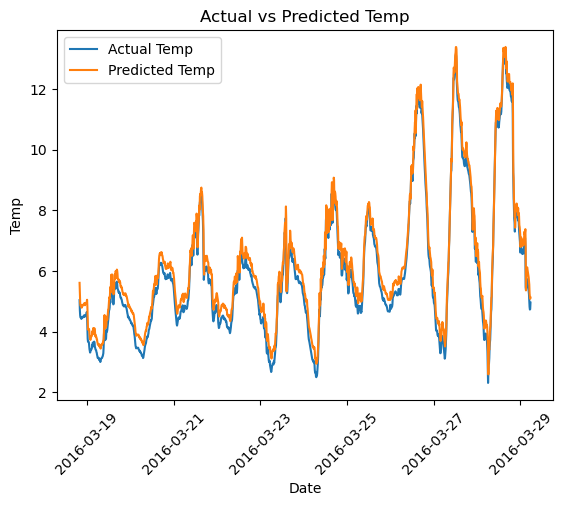

In [118]:
dates_test = test.index[n_hours:]
plt.plot(dates_test[1000:2500], inv_test_Y[1000:2500], label="Actual Temp")
plt.plot(dates_test[1000:2500], inv_test_Y_predicted[1000:2500], label="Predicted Temp")
plt.xlabel('Date')
plt.ylabel('Temp')
plt.title('Actual vs Predicted Temp')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### For Pressure

Train data shape: (294385, 7)
Validation data shape: (84110, 7)
Test data shape: (42056, 7)
Epoch 1/10


/home/chanduchowdary/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2300/2300 - 4s - 2ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 1.8824e-05 - val_mean_squared_error: 1.8824e-05
Epoch 2/10
2300/2300 - 3s - 1ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 3.4520e-05 - val_mean_squared_error: 3.4520e-05
Epoch 3/10
2300/2300 - 3s - 1ms/step - loss: 4.5697e-04 - mean_squared_error: 4.5697e-04 - val_loss: 6.4115e-05 - val_mean_squared_error: 6.4115e-05
Epoch 4/10
2300/2300 - 3s - 1ms/step - loss: 2.3238e-04 - mean_squared_error: 2.3238e-04 - val_loss: 1.3495e-05 - val_mean_squared_error: 1.3495e-05
Epoch 5/10
2300/2300 - 3s - 1ms/step - loss: 1.9983e-04 - mean_squared_error: 1.9983e-04 - val_loss: 8.3454e-06 - val_mean_squared_error: 8.3454e-06
Epoch 6/10
2300/2300 - 3s - 1ms/step - loss: 1.0451e-04 - mean_squared_error: 1.0451e-04 - val_loss: 2.0813e-05 - val_mean_squared_error: 2.0813e-05
Epoch 7/10
2300/2300 - 3s - 1ms/step - loss: 1.2857e-04 - mean_squared_error: 1.2857e-04 - val_loss: 8.4130e-05 - val_mean_squared_er

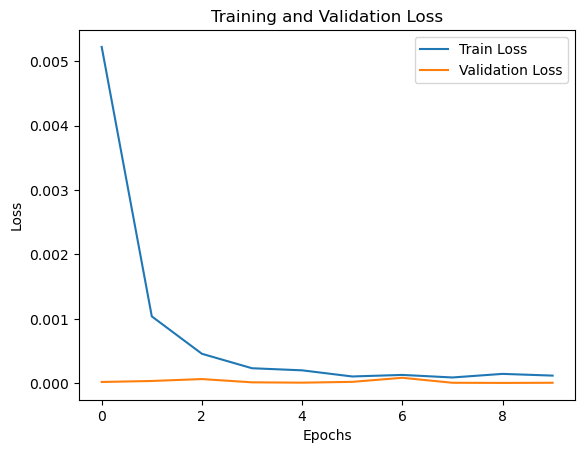

1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step
R-squared score (pressure): 0.999309550000037
RMSE (pressure): 0.20290902488348697


In [119]:
n_train_hours = int(len(df) * 0.7)
n_val_hours = int(len(df) * 0.2)
n_test_hours = len(df) - n_train_hours - n_val_hours

train = df.iloc[:n_train_hours]
val = df.iloc[n_train_hours:n_train_hours + n_val_hours]
test = df.iloc[-n_test_hours:]

print("Train data shape:", train.shape)
print("Validation data shape:", val.shape)
print("Test data shape:", test.shape)

# Preparing data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df['pressure'].values.reshape(-1, 1))

n_hours = 3
n_features = 1

reframed = series_to_supervised(data, n_hours, 1)

values = reframed.values
train_values = values[:n_train_hours, :]
val_values = values[n_train_hours:n_train_hours + n_val_hours, :]
test_values = values[-n_test_hours:, :]

n_obs = n_hours * n_features
train_X, train_Y = train_values[:, :n_obs], train_values[:, -1]
val_X, val_Y = val_values[:, :n_obs], val_values[:, -1]
test_X, test_Y = test_values[:, :n_obs], test_values[:, -1]

train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
val_X = val_X.reshape((val_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

# Model
model = Sequential()
model.add(LSTM(30, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(256, name='FC1'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1, name='out_layer'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Training
history = model.fit(train_X, train_Y, epochs=10, batch_size=128, 
                    validation_data=(val_X, val_Y), verbose=2, shuffle=False)

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
test_Y_predicted = model.predict(test_X)

# Inverse scaling for predictions and actual values
inv_test_Y_predicted = scaler.inverse_transform(test_Y_predicted)
inv_test_Y = scaler.inverse_transform(test_Y.reshape(-1, 1))

# Metrics calculation
r2_pressure = r2_score(inv_test_Y, inv_test_Y_predicted)
rmse_pressure = np.sqrt(mean_squared_error(inv_test_Y, inv_test_Y_predicted))
print("R-squared score (pressure): {}".format(r2_pressure))
print("RMSE (pressure): {}".format(rmse_pressure))

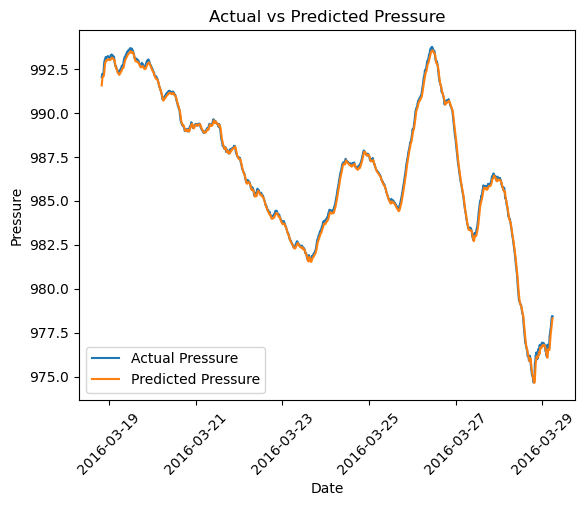

In [120]:
# Plotting actual vs predicted pressure with dates on x-axis
dates_test = test.index[n_hours:]
plt.plot(dates_test[1000:2500], inv_test_Y[1000:2500], label="Actual Pressure")
plt.plot(dates_test[1000:2500], inv_test_Y_predicted[1000:2500], label="Predicted Pressure")
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.title('Actual vs Predicted Pressure')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### For Wind Speed

Reloading Tuner from keras_tuner/lstm_hyperparameter_tuning/tuner0.json
Epoch 1/10


/home/chanduchowdary/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2300/2300 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - loss: 0.0084 - val_loss: 2.1849e-06
Epoch 2/10
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 5.4374e-06 - val_loss: 2.5881e-06
Epoch 3/10
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - loss: 1.4664e-05 - val_loss: 1.6675e-05
Epoch 4/10
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - loss: 1.4728e-05 - val_loss: 7.9463e-06
Epoch 5/10
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - loss: 1.2837e-05 - val_loss: 4.4875e-05
Epoch 6/10
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - loss: 1.0237e-05 - val_loss: 2.3600e-06
Epoch 7/10
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - loss: 1.5092e-05 - val_loss: 4.2729e-06
Epoch 8/10
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - loss: 9.3908e-06 - val_loss: 1.4783e-06
Epoch 9/10
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 1.2418e-05 - val_loss: 1.1158e-05
Epoch 10/10
2300/2300 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - loss: 4.7464e-06 - val_loss: 1.3587e-06
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 

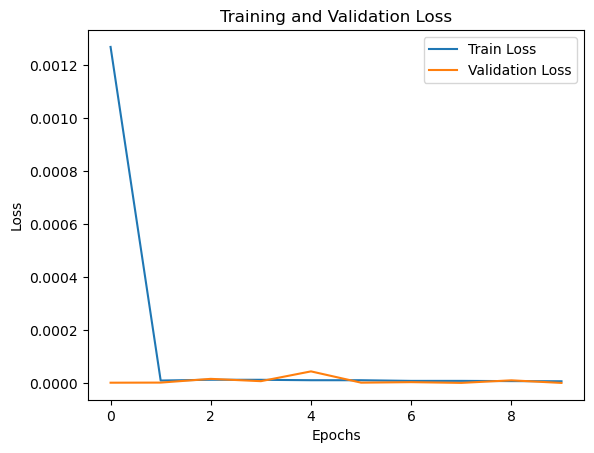

In [121]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import r2_score
from kerastuner.tuners import RandomSearch

# Define the hypermodel function
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(256, name='FC1'))
    model.add(Activation('relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, name='out_layer'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=2,
    executions_per_trial=2,
    directory='keras_tuner',
    project_name='lstm_hyperparameter_tuning')

# Perform the hyperparameter search
tuner.search(train_X, train_Y,
             epochs=10,
             validation_data=(test_X, test_Y),
             callbacks=[EarlyStopping(patience=3)])

# Get the best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(train_X, train_Y, epochs=10, batch_size=128, validation_data=(test_X, test_Y))

# Make predictions
test_Y_predicted = model.predict(test_X)

# Calculate R-squared score
r2_wind_speed = r2_score(test_Y, test_Y_predicted)
rmse_wind_speed = np.sqrt(mean_squared_error(test_Y, test_Y_predicted))
print("R-squared score:", r2_wind_speed)
print("RMSE (Wind Speed): ", rmse_wind_speed)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



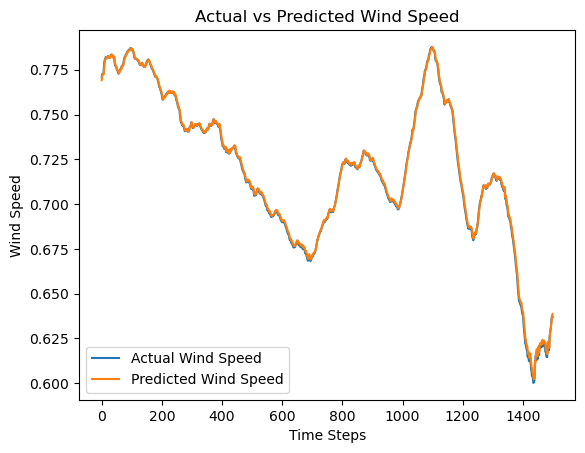

In [122]:
# Plot actual vs predicted wind speed
plt.plot(test_Y[1000:2500], label="Actual Wind Speed")
plt.plot(test_Y_predicted[1000:2500], label="Predicted Wind Speed")
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed')
plt.title('Actual vs Predicted Wind Speed')
plt.legend()
plt.show()

### For Wind Direction

Train data shape: (294385, 7)
Validation data shape: (84110, 7)
Test data shape: (42056, 7)
Epoch 1/10


/home/chanduchowdary/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2300/2300 - 4s - 2ms/step - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 2/10
2300/2300 - 3s - 1ms/step - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 3/10
2300/2300 - 3s - 1ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 4/10
2300/2300 - 3s - 1ms/step - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 5/10
2300/2300 - 3s - 1ms/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 6/10
2300/2300 - 3s - 1ms/step - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 7/10
2300/2300 - 3s - 1ms/step - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 8/10
2300/2300 - 3s - 1ms/step - loss: 0.0296 - mean_squared_error: 0.0296

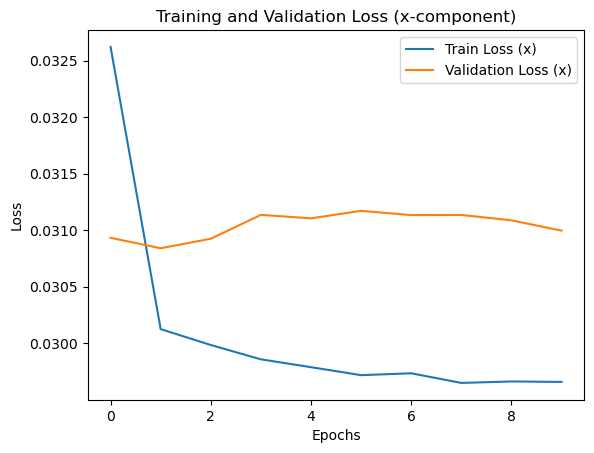

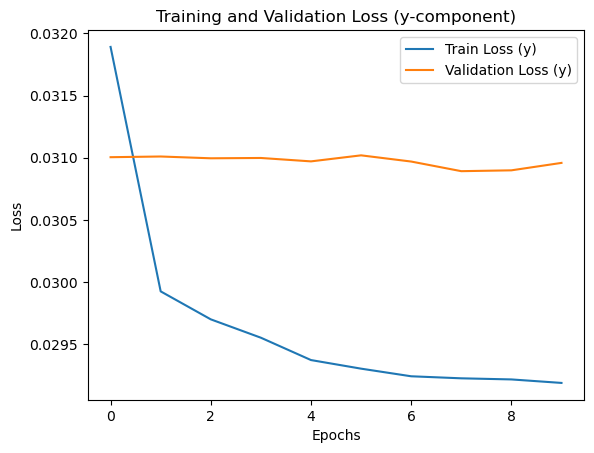

1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step
R-squared score (wind direction x): 0.69
RMSE (wind direction x): 0.38
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step
R-squared score (wind direction y): 0.66
RMSE (wind direction y): 0.38


In [123]:
n_train_hours = int(len(df) * 0.7)
n_val_hours = int(len(df) * 0.2)
n_test_hours = len(df) - n_train_hours - n_val_hours

train = df.iloc[:n_train_hours]
val = df.iloc[n_train_hours:n_train_hours + n_val_hours]
test = df.iloc[-n_test_hours:]

print("Train data shape:", train.shape)
print("Validation data shape:", val.shape)
print("Test data shape:", test.shape)

df['wind_direction_rad'] = np.radians(df['wind_direction'])

# Calculate x and y components of wind direction
df['wind_direction_x'] = np.cos(df['wind_direction_rad'])
df['wind_direction_y'] = np.sin(df['wind_direction_rad'])

# Preparing data
scaler = MinMaxScaler(feature_range=(0, 1))
data_x = scaler.fit_transform(df['wind_direction_x'].values.reshape(-1, 1))
data_y = scaler.fit_transform(df['wind_direction_y'].values.reshape(-1, 1))

n_hours = 3
n_features = 1

reframed_x = series_to_supervised(data_x, n_hours, 1)
reframed_y = series_to_supervised(data_y, n_hours, 1)

values_x = reframed_x.values
values_y = reframed_y.values

train_values_x = values_x[:n_train_hours, :]
val_values_x = values_x[n_train_hours:n_train_hours + n_val_hours, :]
test_values_x = values_x[-n_test_hours:, :]

train_values_y = values_y[:n_train_hours, :]
val_values_y = values_y[n_train_hours:n_train_hours + n_val_hours, :]
test_values_y = values_y[-n_test_hours:, :]

n_obs = n_hours * n_features

train_X_x, train_Y_x = train_values_x[:, :n_obs], train_values_x[:, -1]
val_X_x, val_Y_x = val_values_x[:, :n_obs], val_values_x[:, -1]
test_X_x, test_Y_x = test_values_x[:, :n_obs], test_values_x[:, -1]

train_X_y, train_Y_y = train_values_y[:, :n_obs], train_values_y[:, -1]
val_X_y, val_Y_y = val_values_y[:, :n_obs], val_values_y[:, -1]
test_X_y, test_Y_y = test_values_y[:, :n_obs], test_values_y[:, -1]

train_X_x = train_X_x.reshape((train_X_x.shape[0], n_hours, n_features))
val_X_x = val_X_x.reshape((val_X_x.shape[0], n_hours, n_features))
test_X_x = test_X_x.reshape((test_X_x.shape[0], n_hours, n_features))

train_X_y = train_X_y.reshape((train_X_y.shape[0], n_hours, n_features))
val_X_y = val_X_y.reshape((val_X_y.shape[0], n_hours, n_features))
test_X_y = test_X_y.reshape((test_X_y.shape[0], n_hours, n_features))

# Model for wind direction x-component
model_x = Sequential()
model_x.add(LSTM(30, input_shape=(train_X_x.shape[1], train_X_x.shape[2])))
model_x.add(Dense(256, name='FC1'))
model_x.add(Activation('relu'))
model_x.add(Dropout(0.2))
model_x.add(Dense(1, name='out_layer'))
model_x.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Training for wind direction x-component
history_x = model_x.fit(train_X_x, train_Y_x, epochs=10, batch_size=128, 
                        validation_data=(val_X_x, val_Y_x), verbose=2, shuffle=False)

# Model for wind direction y-component
model_y = Sequential()
model_y.add(LSTM(30, input_shape=(train_X_y.shape[1], train_X_y.shape[2])))
model_y.add(Dense(256, name='FC1'))
model_y.add(Activation('relu'))
model_y.add(Dropout(0.2))
model_y.add(Dense(1, name='out_layer'))
model_y.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Training for wind direction y-component
history_y = model_y.fit(train_X_y, train_Y_y, epochs=10, batch_size=128, 
                        validation_data=(val_X_y, val_Y_y), verbose=2, shuffle=False)

# Plotting training and validation loss for x-component
plt.plot(history_x.history['loss'], label='Train Loss (x)')
plt.plot(history_x.history['val_loss'], label='Validation Loss (x)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (x-component)')
plt.legend()
plt.show()

# Plotting training and validation loss for y-component
plt.plot(history_y.history['loss'], label='Train Loss (y)')
plt.plot(history_y.history['val_loss'], label='Validation Loss (y)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (y-component)')
plt.legend()
plt.show()

# Predictions for wind direction x-component
test_Y_predicted_x = model_x.predict(test_X_x)

# Inverse scaling for predictions and actual values for x-component
inv_test_Y_predicted_x = scaler.inverse_transform(test_Y_predicted_x)
inv_test_Y_x = scaler.inverse_transform(test_Y_x.reshape(-1, 1))

# Metrics calculation for x-component
r2_wind_dir_x = r2_score(inv_test_Y_x, inv_test_Y_predicted_x)
rmse_wind_dir_x = np.sqrt(mean_squared_error(inv_test_Y_x, inv_test_Y_predicted_x))
print("R-squared score (wind direction x): {:.2f}".format(r2_wind_dir_x))
print("RMSE (wind direction x): {:.2f}".format(rmse_wind_dir_x))

# Predictions for wind direction y-component
test_Y_predicted_y = model_y.predict(test_X_y)

# Inverse scaling for predictions and actual values for y-component
inv_test_Y_predicted_y = scaler.inverse_transform(test_Y_predicted_y)
inv_test_Y_y = scaler.inverse_transform(test_Y_y.reshape(-1, 1))

# Metrics calculation for y-component
r2_wind_dir_y = r2_score(inv_test_Y_y, inv_test_Y_predicted_y)
rmse_wind_dir_y = np.sqrt(mean_squared_error(inv_test_Y_y, inv_test_Y_predicted_y))
print("R-squared score (wind direction y): {:.2f}".format(r2_wind_dir_y))
print("RMSE (wind direction y): {:.2f}".format(rmse_wind_dir_y))

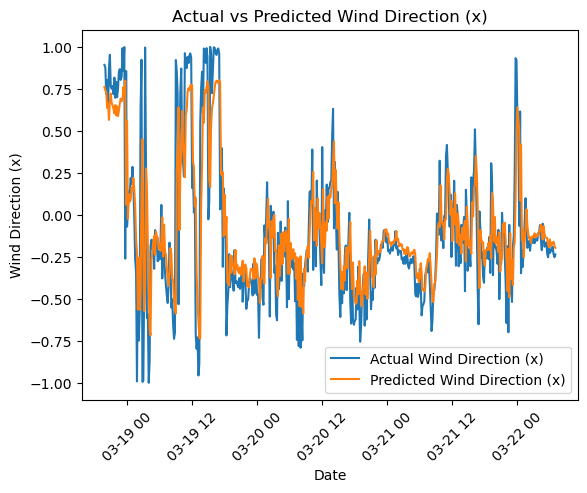

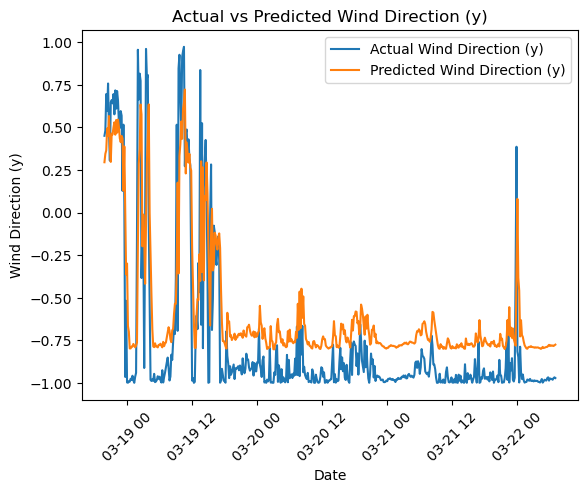

In [124]:
dates_test = test.index[n_hours:]
plt.plot(dates_test[1000:1500], inv_test_Y_x[1000:1500], label="Actual Wind Direction (x)")
plt.plot(dates_test[1000:1500], inv_test_Y_predicted_x[1000:1500], label="Predicted Wind Direction (x)")
plt.xlabel('Date')
plt.ylabel('Wind Direction (x)')
plt.title('Actual vs Predicted Wind Direction (x)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plotting actual vs predicted wind direction y-component with dates on x-axis
plt.plot(dates_test[1000:1500], inv_test_Y_y[1000:1500], label="Actual Wind Direction (y)")
plt.plot(dates_test[1000:1500], inv_test_Y_predicted_y[1000:1500], label="Predicted Wind Direction (y)")
plt.xlabel('Date')
plt.ylabel('Wind Direction (y)')
plt.title('Actual vs Predicted Wind Direction (y)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### For Humidity

Train data shape: (294385, 10)
Validation data shape: (84110, 10)
Test data shape: (42056, 10)
Epoch 1/10


/home/chanduchowdary/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2300/2300 - 4s - 2ms/step - loss: 4.9654e-04 - mean_squared_error: 4.9654e-04 - val_loss: 1.1341e-04 - val_mean_squared_error: 1.1341e-04
Epoch 2/10
2300/2300 - 3s - 1ms/step - loss: 3.1201e-04 - mean_squared_error: 3.1201e-04 - val_loss: 1.0306e-04 - val_mean_squared_error: 1.0306e-04
Epoch 3/10
2300/2300 - 3s - 1ms/step - loss: 2.4863e-04 - mean_squared_error: 2.4863e-04 - val_loss: 7.8931e-05 - val_mean_squared_error: 7.8931e-05
Epoch 4/10
2300/2300 - 3s - 1ms/step - loss: 2.2611e-04 - mean_squared_error: 2.2611e-04 - val_loss: 1.6163e-04 - val_mean_squared_error: 1.6163e-04
Epoch 5/10
2300/2300 - 3s - 1ms/step - loss: 2.0731e-04 - mean_squared_error: 2.0731e-04 - val_loss: 2.2049e-04 - val_mean_squared_error: 2.2049e-04
Epoch 6/10
2300/2300 - 3s - 1ms/step - loss: 2.0837e-04 - mean_squared_error: 2.0837e-04 - val_loss: 1.8893e-04 - val_mean_squared_error: 1.8893e-04
Epoch 7/10
2300/2300 - 3s - 1ms/step - loss: 2.0884e-04 - mean_squared_error: 2.0884e-04 - val_loss: 4.4386e-05 - val

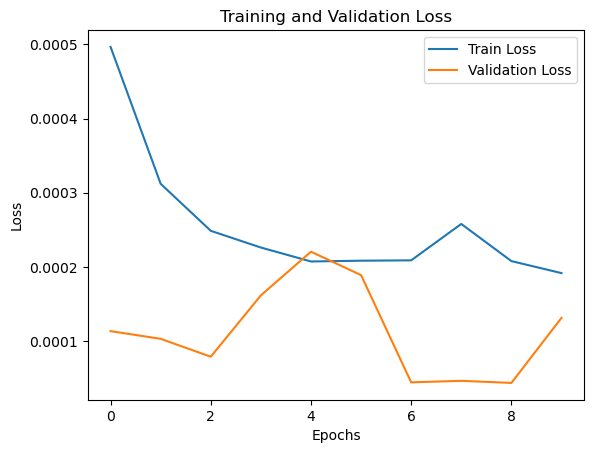

1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step
R-squared score (humidity): 0.9951420218619631
RMSE (humidity): 0.28922952076309644


In [131]:
n_train_hours = int(len(df) * 0.7)
n_val_hours = int(len(df) * 0.2)
n_test_hours = len(df) - n_train_hours - n_val_hours

train = df.iloc[:n_train_hours]
val = df.iloc[n_train_hours:n_train_hours + n_val_hours]
test = df.iloc[-n_test_hours:]

print("Train data shape:", train.shape)
print("Validation data shape:", val.shape)
print("Test data shape:", test.shape)

# Preparing data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df['humidity'].values.reshape(-1, 1))

n_hours = 3
n_features = 1

reframed = series_to_supervised(data, n_hours, 1)

values = reframed.values
train_values = values[:n_train_hours, :]
val_values = values[n_train_hours:n_train_hours + n_val_hours, :]
test_values = values[-n_test_hours:, :]

n_obs = n_hours * n_features
train_X, train_Y = train_values[:, :n_obs], train_values[:, -1]
val_X, val_Y = val_values[:, :n_obs], val_values[:, -1]
test_X, test_Y = test_values[:, :n_obs], test_values[:, -1]

train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
val_X = val_X.reshape((val_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

# Model
model = Sequential()
model.add(LSTM(30, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(256, name='FC1'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1, name='out_layer'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Training
history = model.fit(train_X, train_Y, epochs=10, batch_size=128, 
                    validation_data=(val_X, val_Y), verbose=2, shuffle=False)

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
test_Y_predicted = model.predict(test_X)

# Inverse scaling for predictions and actual values
inv_test_Y_predicted = scaler.inverse_transform(test_Y_predicted)
inv_test_Y = scaler.inverse_transform(test_Y.reshape(-1, 1))

# Metrics calculation
r2_humidity = r2_score(inv_test_Y, inv_test_Y_predicted)
rmse_humidity = np.sqrt(mean_squared_error(inv_test_Y, inv_test_Y_predicted))
print("R-squared score (humidity): {}".format(r2_humidity))
print("RMSE (humidity): {}".format(rmse_humidity))

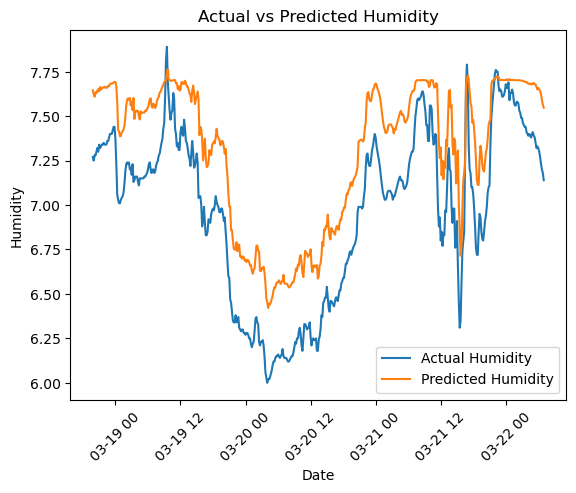

In [132]:
dates_test = test.index[n_hours:]
plt.plot(dates_test[1000:1500], inv_test_Y[1000:1500], label="Actual Humidity")
plt.plot(dates_test[1000:1500], inv_test_Y_predicted[1000:1500], label="Predicted Humidity")
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Actual vs Predicted Humidity')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### For Relative Humidity

Train data shape: (294385, 10)
Validation data shape: (84110, 10)
Test data shape: (42056, 10)
Epoch 1/10


/home/chanduchowdary/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2300/2300 - 4s - 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 4.0665e-04 - val_mean_squared_error: 4.0665e-04
Epoch 2/10
2300/2300 - 3s - 1ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 6.3845e-04 - val_mean_squared_error: 6.3845e-04
Epoch 3/10
2300/2300 - 3s - 1ms/step - loss: 6.5748e-04 - mean_squared_error: 6.5748e-04 - val_loss: 2.2139e-04 - val_mean_squared_error: 2.2139e-04
Epoch 4/10
2300/2300 - 3s - 1ms/step - loss: 3.7685e-04 - mean_squared_error: 3.7685e-04 - val_loss: 3.4200e-04 - val_mean_squared_error: 3.4200e-04
Epoch 5/10
2300/2300 - 3s - 1ms/step - loss: 3.3612e-04 - mean_squared_error: 3.3612e-04 - val_loss: 3.5594e-04 - val_mean_squared_error: 3.5594e-04
Epoch 6/10
2300/2300 - 3s - 1ms/step - loss: 3.2873e-04 - mean_squared_error: 3.2873e-04 - val_loss: 1.5095e-04 - val_mean_squared_error: 1.5095e-04
Epoch 7/10
2300/2300 - 3s - 1ms/step - loss: 3.2531e-04 - mean_squared_error: 3.2531e-04 - val_loss: 1.9063e-04 - val_mean_squared_er

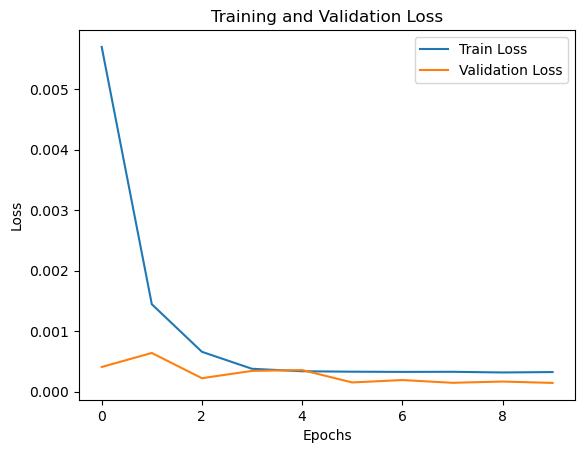

1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step
R-squared score (relative_humidity): 0.9957198597724344
RMSE (relative_humidity): 1.1029340766127744


In [133]:
n_train_hours = int(len(df) * 0.7)
n_val_hours = int(len(df) * 0.2)
n_test_hours = len(df) - n_train_hours - n_val_hours

train = df.iloc[:n_train_hours]
val = df.iloc[n_train_hours:n_train_hours + n_val_hours]
test = df.iloc[-n_test_hours:]

print("Train data shape:", train.shape)
print("Validation data shape:", val.shape)
print("Test data shape:", test.shape)

# Preparing data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df['relative_humidity'].values.reshape(-1, 1))

n_hours = 3
n_features = 1

reframed = series_to_supervised(data, n_hours, 1)

values = reframed.values
train_values = values[:n_train_hours, :]
val_values = values[n_train_hours:n_train_hours + n_val_hours, :]
test_values = values[-n_test_hours:, :]

n_obs = n_hours * n_features
train_X, train_Y = train_values[:, :n_obs], train_values[:, -1]
val_X, val_Y = val_values[:, :n_obs], val_values[:, -1]
test_X, test_Y = test_values[:, :n_obs], test_values[:, -1]

train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
val_X = val_X.reshape((val_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

# Model
model = Sequential()
model.add(LSTM(30, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(256, name='FC1'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1, name='out_layer'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Training
history = model.fit(train_X, train_Y, epochs=10, batch_size=128, 
                    validation_data=(val_X, val_Y), verbose=2, shuffle=False)

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
test_Y_predicted = model.predict(test_X)

# Inverse scaling for predictions and actual values
inv_test_Y_predicted = scaler.inverse_transform(test_Y_predicted)
inv_test_Y = scaler.inverse_transform(test_Y.reshape(-1, 1))

# Metrics calculation
r2_rel_humidity = r2_score(inv_test_Y, inv_test_Y_predicted)
rmse_rel_humidity = np.sqrt(mean_squared_error(inv_test_Y, inv_test_Y_predicted))
print("R-squared score (relative_humidity): {}".format(r2_rel_humidity))
print("RMSE (relative_humidity): {}".format(rmse_rel_humidity))

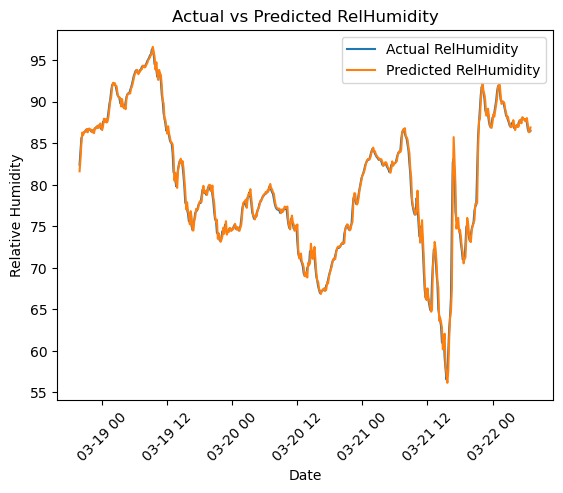

In [134]:
dates_test = test.index[n_hours:]
plt.plot(dates_test[1000:1500], inv_test_Y[1000:1500], label="Actual RelHumidity")
plt.plot(dates_test[1000:1500], inv_test_Y_predicted[1000:1500], label="Predicted RelHumidity")
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.title('Actual vs Predicted RelHumidity')
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [142]:
rmse_values = [rmse_humidity, rmse_pressure, rmse_rel_humidity, rmse_temp, rmse_wind_dir_x, rmse_wind_dir_y, rmse_wind_speed]
r2_values = [r2_humidity, r2_pressure, r2_rel_humidity, r2_temp, r2_wind_dir_x, r2_wind_dir_y, r2_wind_speed]
rmse_wind_speed = 0.1
features = ['Humidity', 'Pressure', 'Relative Humidity', 'Temperature', 'Wind DirectionX', 'Wind DirectionY', 'Wind Speed']

# Create figure for RMSE
fig_rmse = go.Figure(data=[go.Bar(x=features, y=rmse_values, marker_color='skyblue')])
fig_rmse.update_layout(title='RMSE Values for Different Features',
                  xaxis_title='Features',
                  yaxis_title='RMSE Value')

# Create figure for R-squared
fig_r2 = go.Figure(data=[go.Bar(x=features, y=r2_values, marker_color='lightgreen')])
fig_r2.update_layout(title='R-squared Values for Different Features',
                  xaxis_title='Features',
                  yaxis_title='R-squared Value',
                  yaxis=dict(range=[-1.5, 1.5]))

# Display figures
fig_rmse.show()
fig_r2.show()